In [11]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('community_dataset.csv')
data

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


distance_to_vasculature — расстояние до ближайших сосудов;
distance_to_largest_cell — расстояние до ближайшей крупной клетки;
immune_marker_1 — экспрессия иммунного маркера 1 в данной клетке;
immune_marker_2 — экспрессия иммунного маркера 2 в данной клетке;
cell_type — тип клетки;
area_of_cell — размер клетки;
case_id — уникальный ID пациента.

In [6]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import sweetviz as sv

df= pd.read_csv('community_dataset.csv')

report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Согласно отчету sweetviz   между area_of_cell  и cell_type

есть  прямая коррелятивная зависимость  r= 0.47

area_of_cell  cell_type r= 0.47

 между остальными позициями:
 
 
immune_marker_2    r=0.38 с age_group=0.13
immune_marker_1      r=0.29, с age_group = 0.28
distance_to_largest_cell    r=0.12   с age_group = 0.04
distance_to_vasculature     r=0.0 с age_group =0.2



Есть ли стат-значимость между типом клетки и:

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.
б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.
в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.
В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

<AxesSubplot: xlabel='area_of_cell', ylabel='cell_type'>

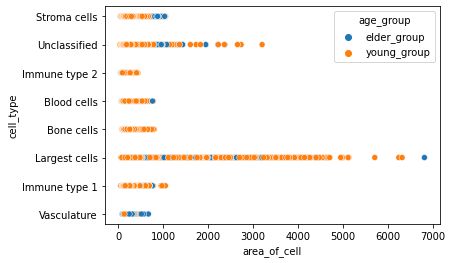

In [3]:
# Есть ли стат-значимость между типом клетки и Размером клетки (area_of_cell), добавьте hue по возрастным группам.

import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df= pd.read_csv('community_dataset.csv')

sns.scatterplot(data=df, x="area_of_cell", y="cell_type", hue="age_group")

Есть ли стат-значимость между cell_type и area_of_cell,  hue по возрастным группам.

тип клетки - признак категориальный, всего типов 8. Для того чтобы осуществить корреляцию признак необходимо закодировать

In [6]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [4]:


cells = df["cell_type"]

cells


0          Stroma cells
1          Stroma cells
2          Stroma cells
3          Unclassified
4          Unclassified
              ...      
269437     Stroma cells
269438    Immune type 1
269439     Unclassified
269440     Stroma cells
269441     Stroma cells
Name: cell_type, Length: 269442, dtype: object

In [5]:
import category_encoders as ce


encoder = ce.OneHotEncoder(cols=['cell_type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data ['cell_type'])
data_by_type = pd.concat([data, type_bin], axis=1)

data_by_type




,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,1,0,0,0,0,0,0,0
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,1,0,0,0,0,0,0,0
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,1,0,0,0,0,0,0,0
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,0,1,0,0,0,0,0,0
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group,1,0,0,0,0,0,0,0
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group,0,0,0,0,0,0,1,0
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group,0,1,0,0,0,0,0,0
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group,1,0,0,0,0,0,0,0


In [6]:
cod=data_by_type[[ "cell_type", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
cod
#  выводим полученную кодировку столбцов

,cell_type,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,Stroma cells,1,0,0,0,0,0,0,0
1,Stroma cells,1,0,0,0,0,0,0,0
2,Stroma cells,1,0,0,0,0,0,0,0
3,Unclassified,0,1,0,0,0,0,0,0
4,Unclassified,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269437,Stroma cells,1,0,0,0,0,0,0,0
269438,Immune type 1,0,0,0,0,0,0,1,0
269439,Unclassified,0,1,0,0,0,0,0,0
269440,Stroma cells,1,0,0,0,0,0,0,0


In [7]:
cells_name = cod.drop_duplicates ()
cells_name
#выводим соответствие кодировки типу клеток

,cell_type,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,Stroma cells,1,0,0,0,0,0,0,0
3,Unclassified,0,1,0,0,0,0,0,0
35,Immune type 2,0,0,1,0,0,0,0,0
65,Blood cells,0,0,0,1,0,0,0,0
99,Bone cells,0,0,0,0,1,0,0,0
115,Largest cells,0,0,0,0,0,1,0,0
265,Immune type 1,0,0,0,0,0,0,1,0
270,Vasculature,0,0,0,0,0,0,0,1


In [8]:
area_by_type=data_by_type[["area_of_cell", "cell_type", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
area_by_type
# выводи столбцы кодирующие тип клеток и столбец area_of_cell



,area_of_cell,cell_type,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,185,Stroma cells,1,0,0,0,0,0,0,0
1,209,Stroma cells,1,0,0,0,0,0,0,0
2,254,Stroma cells,1,0,0,0,0,0,0,0
3,156,Unclassified,0,1,0,0,0,0,0,0
4,194,Unclassified,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
269437,258,Stroma cells,1,0,0,0,0,0,0,0
269438,160,Immune type 1,0,0,0,0,0,0,1,0
269439,190,Unclassified,0,1,0,0,0,0,0,0
269440,535,Stroma cells,1,0,0,0,0,0,0,0


In [9]:
corr_1 = area_by_type.corr(method='pearson')
corr_1
#   1. изучаем корреляцию размера клетки и ее типа: cell_type_6  имеет корреляцию 0,46

,area_of_cell,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
area_of_cell,1.000000,-0.005350,-0.076455,-0.046106,0.049197,0.025655,0.464440,-0.004407,-0.001911
cell_type_1,-0.005350,1.000000,-0.771443,-0.339321,-0.137906,-0.131249,-0.115650,-0.194982,-0.031019
cell_type_2,-0.076455,-0.771443,1.000000,-0.145475,-0.059124,-0.056269,-0.049582,-0.083593,-0.013299
cell_type_3,-0.046106,-0.339321,-0.145475,1.000000,-0.026006,-0.024750,-0.021809,-0.036769,-0.005849
cell_type_4,0.049197,-0.137906,-0.059124,-0.026006,1.000000,-0.010059,-0.008863,-0.014943,-0.002377
cell_type_5,0.025655,-0.131249,-0.056269,-0.024750,-0.010059,1.000000,-0.008436,-0.014222,-0.002263
cell_type_6,0.464440,-0.115650,-0.049582,-0.021809,-0.008863,-0.008436,1.000000,-0.012532,-0.001994
cell_type_7,-0.004407,-0.194982,-0.083593,-0.036769,-0.014943,-0.014222,-0.012532,1.000000,-0.003361
cell_type_8,-0.001911,-0.031019,-0.013299,-0.005849,-0.002377,-0.002263,-0.001994,-0.003361,1.000000


<AxesSubplot: >

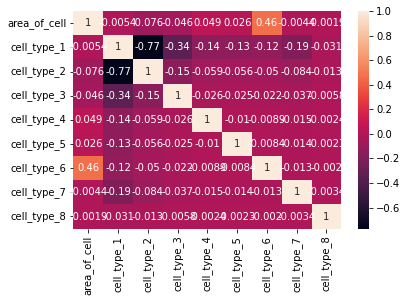

In [16]:
sns.heatmap(area_by_type.corr(), annot = True)

In [19]:
im1=data_by_type[["immune_marker_1", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
im1
# 2.  выводим столбцы кодирующие тип клеток и столбец immune_marker_1

,immune_marker_1,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,10.803755,1,0,0,0,0,0,0,0
1,11.749179,1,0,0,0,0,0,0,0
2,15.124372,1,0,0,0,0,0,0,0
3,14.221883,0,1,0,0,0,0,0,0
4,19.978977,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269437,9.667603,1,0,0,0,0,0,0,0
269438,20.298864,0,0,0,0,0,0,1,0
269439,10.351852,0,1,0,0,0,0,0,0
269440,11.459289,1,0,0,0,0,0,0,0


In [20]:
corr_2 = im1.corr(method='pearson')
corr_2
#  изучаем с каким типом клеток есть корреляция  immune_marker_1 

,immune_marker_1,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
immune_marker_1,1.000000,-0.158404,0.042931,0.038418,0.022266,0.172931,-0.016833,0.206743,0.052072
cell_type_1,-0.158404,1.000000,-0.771443,-0.339321,-0.137906,-0.131249,-0.115650,-0.194982,-0.031019
cell_type_2,0.042931,-0.771443,1.000000,-0.145475,-0.059124,-0.056269,-0.049582,-0.083593,-0.013299
cell_type_3,0.038418,-0.339321,-0.145475,1.000000,-0.026006,-0.024750,-0.021809,-0.036769,-0.005849
cell_type_4,0.022266,-0.137906,-0.059124,-0.026006,1.000000,-0.010059,-0.008863,-0.014943,-0.002377
cell_type_5,0.172931,-0.131249,-0.056269,-0.024750,-0.010059,1.000000,-0.008436,-0.014222,-0.002263
cell_type_6,-0.016833,-0.115650,-0.049582,-0.021809,-0.008863,-0.008436,1.000000,-0.012532,-0.001994
cell_type_7,0.206743,-0.194982,-0.083593,-0.036769,-0.014943,-0.014222,-0.012532,1.000000,-0.003361
cell_type_8,0.052072,-0.031019,-0.013299,-0.005849,-0.002377,-0.002263,-0.001994,-0.003361,1.000000


<AxesSubplot: >

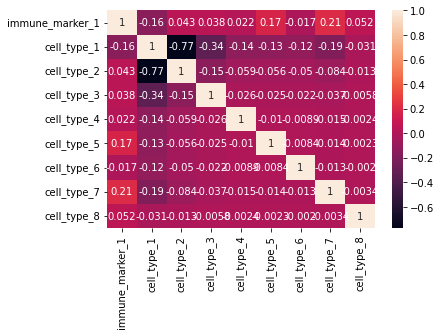

In [21]:
sns.heatmap(im1.corr(), annot = True)


Для позиции immune_marker_1 есть прямая коррелятивная зависимость со следующими типами клеток:   cell_type_7= 0,21

In [22]:
im2=data_by_type[["immune_marker_2", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
im2
# 3.  выводим столбцы кодирующие тип клеток и столбец immune_marker_2

,immune_marker_2,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,187.998971,1,0,0,0,0,0,0,0
1,155.357076,1,0,0,0,0,0,0,0
2,182.626888,1,0,0,0,0,0,0,0
3,158.381917,0,1,0,0,0,0,0,0
4,159.071269,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269437,29.866927,1,0,0,0,0,0,0,0
269438,40.847738,0,0,0,0,0,0,1,0
269439,22.967870,0,1,0,0,0,0,0,0
269440,57.536165,1,0,0,0,0,0,0,0


In [48]:
corr_3 = im2.corr(method='pearson')
corr_3
#  изучаем с каким типом клеток есть корреляция  immune_marker_2 

,immune_marker_2,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
immune_marker_2,1.000000,0.007802,-0.089430,-0.069331,0.238992,0.277820,-0.043046,0.027543,-0.003562
cell_type_1,0.007802,1.000000,-0.771443,-0.339321,-0.137906,-0.131249,-0.115650,-0.194982,-0.031019
cell_type_2,-0.089430,-0.771443,1.000000,-0.145475,-0.059124,-0.056269,-0.049582,-0.083593,-0.013299
cell_type_3,-0.069331,-0.339321,-0.145475,1.000000,-0.026006,-0.024750,-0.021809,-0.036769,-0.005849
cell_type_4,0.238992,-0.137906,-0.059124,-0.026006,1.000000,-0.010059,-0.008863,-0.014943,-0.002377
cell_type_5,0.277820,-0.131249,-0.056269,-0.024750,-0.010059,1.000000,-0.008436,-0.014222,-0.002263
cell_type_6,-0.043046,-0.115650,-0.049582,-0.021809,-0.008863,-0.008436,1.000000,-0.012532,-0.001994
cell_type_7,0.027543,-0.194982,-0.083593,-0.036769,-0.014943,-0.014222,-0.012532,1.000000,-0.003361
cell_type_8,-0.003562,-0.031019,-0.013299,-0.005849,-0.002377,-0.002263,-0.001994,-0.003361,1.000000


<AxesSubplot: >

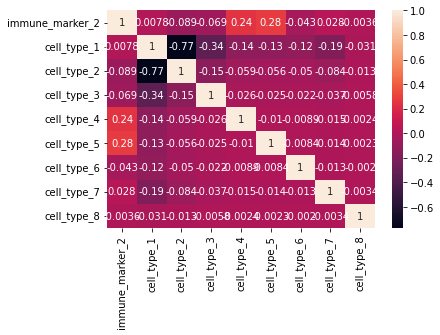

In [23]:
sns.heatmap(im2.corr(), annot = True)

Для позиции immune_marker_2 есть прямая коррелятивная зависимость со следующими типами клеток: cell_type_4 =0,24, cell_type_5 = 0,28

In [24]:
distv=data_by_type[["distance_to_vasculature", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
distv
# 4.  выводим столбцы кодирующие тип клеток и столбец distance_to_vasculature

,distance_to_vasculature,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,988.509380,1,0,0,0,0,0,0,0
1,787.852379,1,0,0,0,0,0,0,0
2,960.635580,1,0,0,0,0,0,0,0
3,702.033032,0,1,0,0,0,0,0,0
4,830.399371,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269437,928.977004,1,0,0,0,0,0,0,0
269438,651.888363,0,0,0,0,0,0,1,0
269439,754.601247,0,1,0,0,0,0,0,0
269440,901.768538,1,0,0,0,0,0,0,0


In [25]:
corr_4 = distv.corr(method='pearson')
corr_4
#  изучаем с каким типом клеток есть корреляция  distance_to_vasculature

,distance_to_vasculature,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
distance_to_vasculature,1.000000,0.056488,-0.037125,-0.057916,0.020026,0.023591,-0.011843,0.001736,-0.035131
cell_type_1,0.056488,1.000000,-0.771443,-0.339321,-0.137906,-0.131249,-0.115650,-0.194982,-0.031019
cell_type_2,-0.037125,-0.771443,1.000000,-0.145475,-0.059124,-0.056269,-0.049582,-0.083593,-0.013299
cell_type_3,-0.057916,-0.339321,-0.145475,1.000000,-0.026006,-0.024750,-0.021809,-0.036769,-0.005849
cell_type_4,0.020026,-0.137906,-0.059124,-0.026006,1.000000,-0.010059,-0.008863,-0.014943,-0.002377
cell_type_5,0.023591,-0.131249,-0.056269,-0.024750,-0.010059,1.000000,-0.008436,-0.014222,-0.002263
cell_type_6,-0.011843,-0.115650,-0.049582,-0.021809,-0.008863,-0.008436,1.000000,-0.012532,-0.001994
cell_type_7,0.001736,-0.194982,-0.083593,-0.036769,-0.014943,-0.014222,-0.012532,1.000000,-0.003361
cell_type_8,-0.035131,-0.031019,-0.013299,-0.005849,-0.002377,-0.002263,-0.001994,-0.003361,1.000000


<AxesSubplot: >

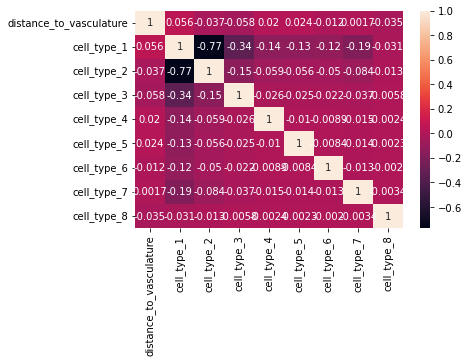

In [26]:
sns.heatmap(distv.corr(), annot = True)

In [ ]:
Для позиции distance_to_vasculature  нет коррелятивных зависимостей

In [27]:
distl=data_by_type[["distance_to_largest_cell", "cell_type_1",  "cell_type_2", "cell_type_3" , 
            "cell_type_4", "cell_type_5" ,"cell_type_6"  ,"cell_type_7" ,"cell_type_8"]]
distl
# 5.  выводим столбцы кодирующие тип клеток и столбец distance_to_largest_cell

,distance_to_largest_cell,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
0,612.076506,1,0,0,0,0,0,0,0
1,637.787202,1,0,0,0,0,0,0,0
2,700.283468,1,0,0,0,0,0,0,0
3,676.409695,0,1,0,0,0,0,0,0
4,863.269930,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
269437,720.993469,1,0,0,0,0,0,0,0
269438,1040.658354,0,0,0,0,0,0,1,0
269439,688.651619,0,1,0,0,0,0,0,0
269440,700.092692,1,0,0,0,0,0,0,0


In [28]:
corr_5 = distl.corr(method='pearson')
corr_5
#  изучаем с каким типом клеток есть корреляция  distance_to_largest_cell

,distance_to_largest_cell,cell_type_1,cell_type_2,cell_type_3,cell_type_4,cell_type_5,cell_type_6,cell_type_7,cell_type_8
distance_to_largest_cell,1.000000,0.022432,0.009992,-0.022289,0.002109,0.006242,-0.112587,-0.006944,0.001554
cell_type_1,0.022432,1.000000,-0.771443,-0.339321,-0.137906,-0.131249,-0.115650,-0.194982,-0.031019
cell_type_2,0.009992,-0.771443,1.000000,-0.145475,-0.059124,-0.056269,-0.049582,-0.083593,-0.013299
cell_type_3,-0.022289,-0.339321,-0.145475,1.000000,-0.026006,-0.024750,-0.021809,-0.036769,-0.005849
cell_type_4,0.002109,-0.137906,-0.059124,-0.026006,1.000000,-0.010059,-0.008863,-0.014943,-0.002377
cell_type_5,0.006242,-0.131249,-0.056269,-0.024750,-0.010059,1.000000,-0.008436,-0.014222,-0.002263
cell_type_6,-0.112587,-0.115650,-0.049582,-0.021809,-0.008863,-0.008436,1.000000,-0.012532,-0.001994
cell_type_7,-0.006944,-0.194982,-0.083593,-0.036769,-0.014943,-0.014222,-0.012532,1.000000,-0.003361
cell_type_8,0.001554,-0.031019,-0.013299,-0.005849,-0.002377,-0.002263,-0.001994,-0.003361,1.000000


<AxesSubplot: >

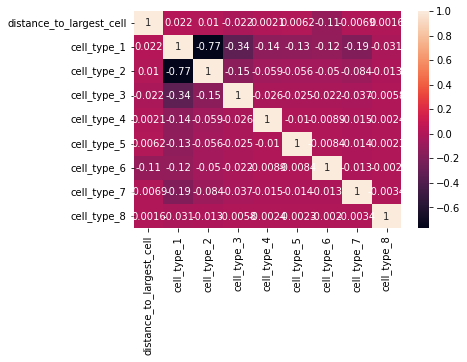

In [29]:
sns.heatmap(distl.corr(), annot = True)

У позиции distance_to_largest_cell  нет значимой корреляции с типом клеток 